# Imports

In [1]:
import os

from matplotlib import pyplot as plt

from src.utils import (
    get_data,
    get_device,
    load,
    plot_image_and_prediction,
    plot_image_channels,
    plot_labels_in_germany,
    plot_true_vs_predicted,
    plot_predictions,
    predict_batch,
    predict_image,
    seed_everyting,
    test,
    loss,
)

# Global parameters

In [2]:
image_size = 256
img_dir = "data/images"
model_dir = "models"
patch_dir = "data/patches"
results_dir = "results"
gedi_dir = "data/gedi"
random_state = 42
batch_size = 12
num_workers = os.cpu_count() // 2
bins = list(range(0, 55, 5))
device = get_device()

seed_everyting(random_state)

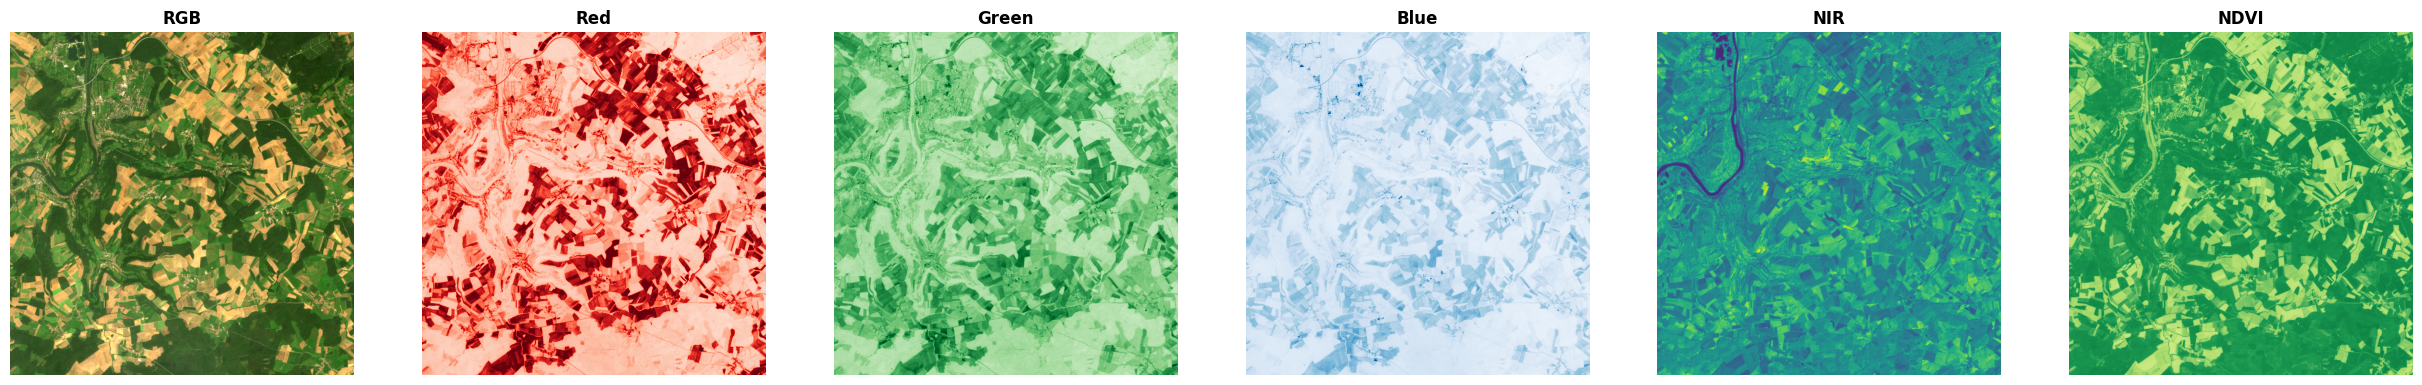

In [3]:
plot_image_channels(f"{img_dir}/L15-1060E-1348N.tif")

In [4]:
# plot_labels_in_germany()

In [5]:
# Plot histogram of labels
# TODO

# Create dataloaders

In [6]:
# Create dataloaders
_, _, test_dl = get_data(
    img_dir, patch_dir, gedi_dir, image_size, batch_size, num_workers, bins
)

INFO:root:Starting preprocessing...
INFO:root:Directories validated.
INFO:root:Images loaded.
INFO:root:Number of images: 48
INFO:root:GEDI data loaded.
INFO:root:Loaded existing patch info file. Skipping image processing.
INFO:root:Number of patches: 9234
INFO:root:Number of labels: 629074


# Load models

In [14]:
models = {
    filename[: -len(".pt")]: load(os.path.join(model_dir, filename), device)
    for filename in [f for f in os.listdir(model_dir) if f.endswith(".pt")]
}

# Visualise results

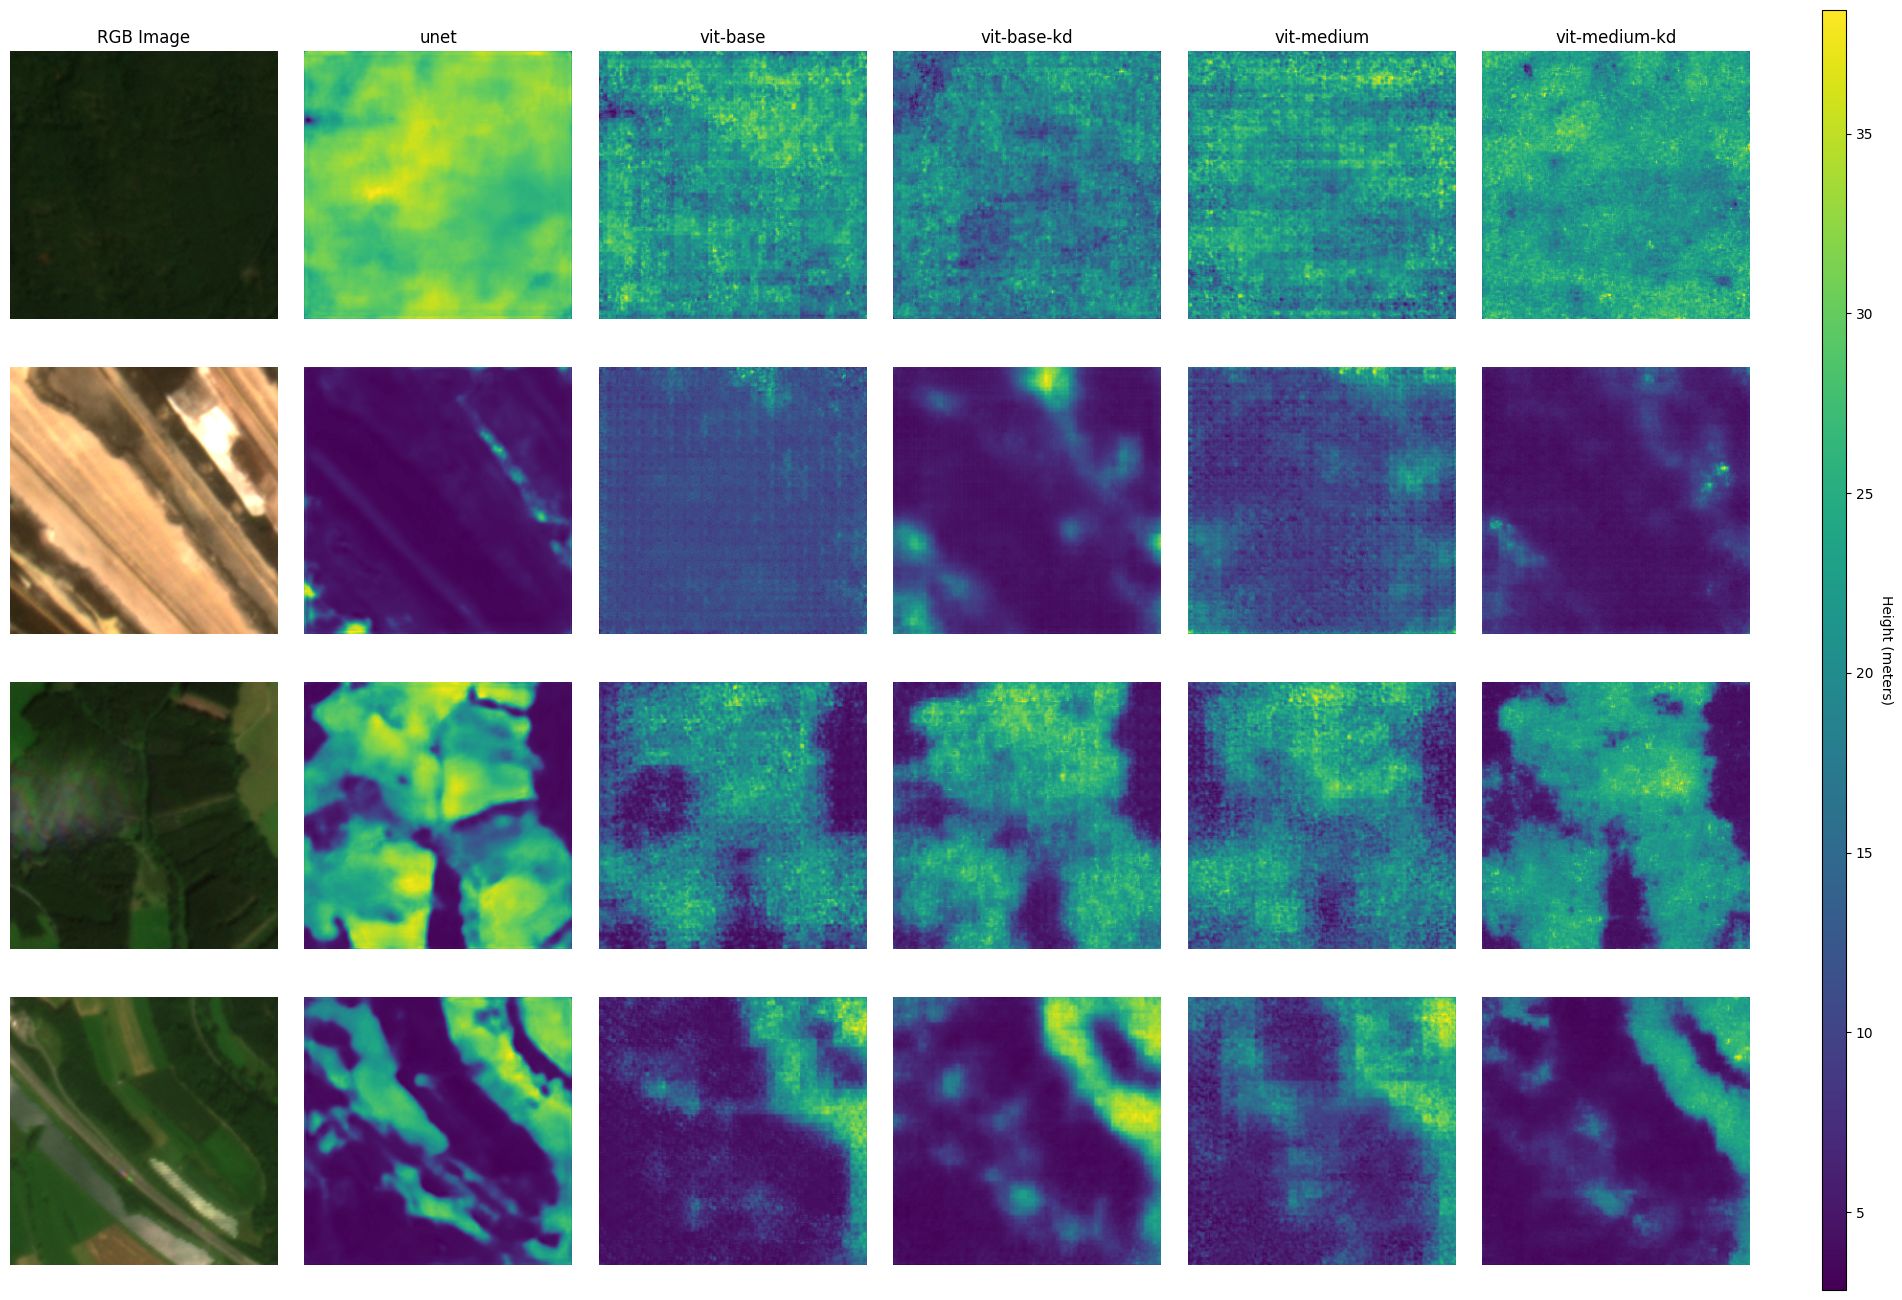

In [8]:
images, preds = predict_batch(models, test_dl, device)
plot_predictions(images, preds)

# Select model

In [12]:
model_name = "u-plusplus-unetplusplus-efficientnet-b2"
model = models[model_name]

100%|██████████| 256/256 [00:41<00:00,  6.14it/s]


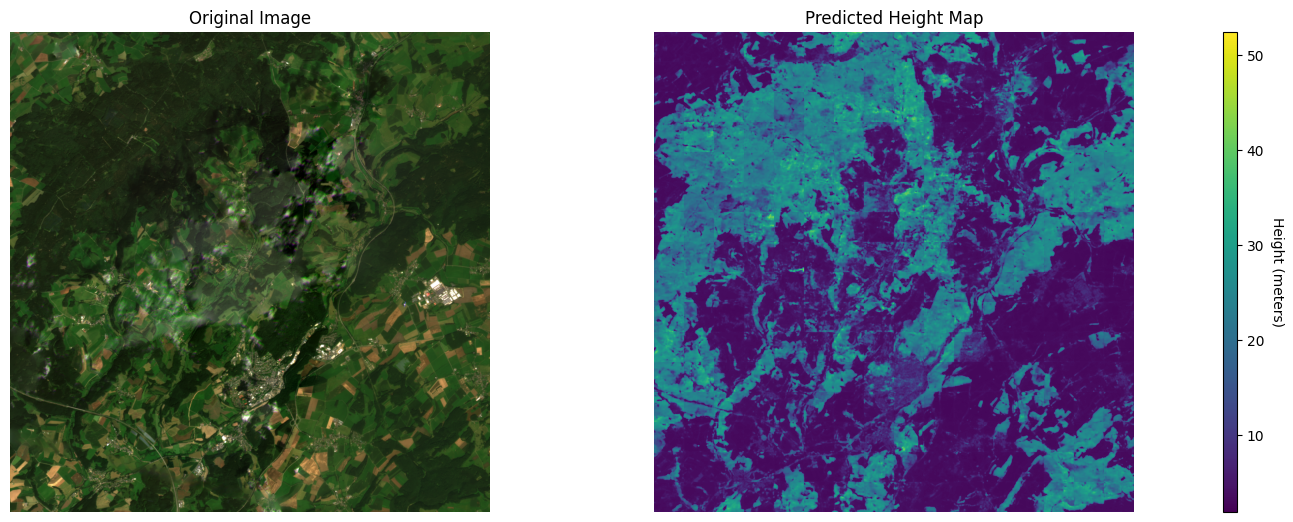

In [10]:
img, pred = predict_image(model, device, f"{img_dir}/L15-1060E-1355N.tif", image_size)
plot_image_and_prediction(img, pred)

# Evaulate model

Testing:   0%|          | 0/8 [00:00<?, ?it/s]

Testing: 100%|██████████| 8/8 [00:28<00:00,  3.55s/it]


Final test loss: 1.714529
Final MAE loss: 2.648213
Final RMSE loss: 4.577412
Ranges: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
Losses by range: [0.8373577 2.3490982 2.938216  2.634785  1.9615464 2.425767  5.9200363
 6.519402  4.6605077 4.3049417]


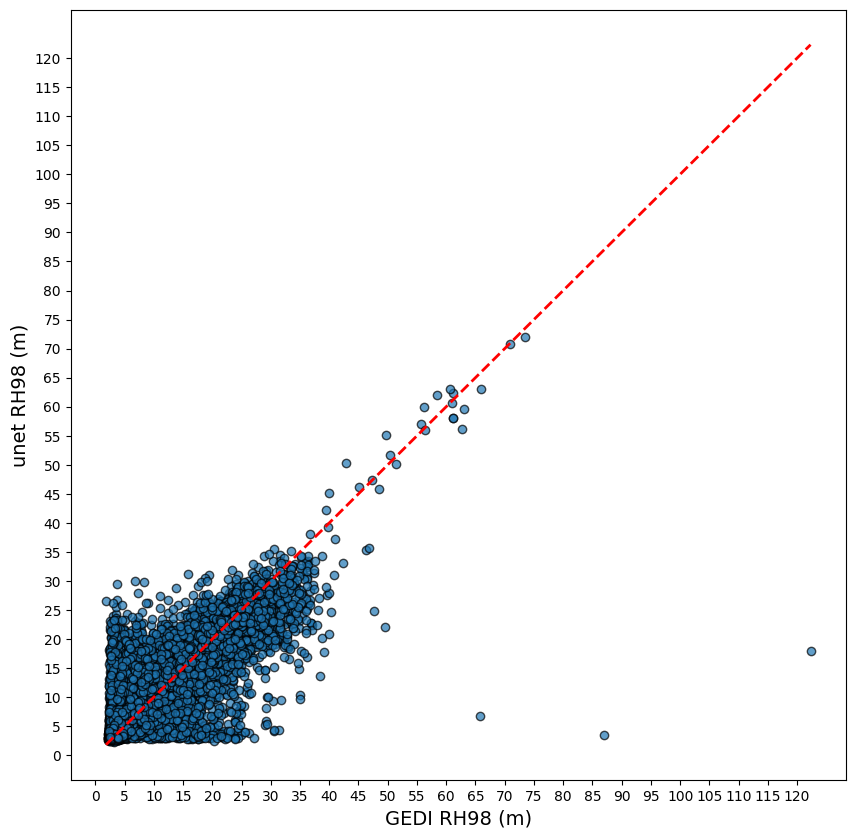

In [13]:
(
    test_loss,
    test_mae,
    test_rmse,
    test_loss_by_range,
    truth,
    predicted,
) = test(model, test_dl, loss, device, bins)

print(
    f"Final test loss: {test_loss:>8f}\n"
    f"Final MAE loss: {test_mae:>8f}\n"
    f"Final RMSE loss: {test_rmse:>8f}\n"
    f"Ranges: {bins}\n"
    f"Losses by range: {test_loss_by_range}"
)

plot_true_vs_predicted(truth, predicted, model_name)